In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv('data/tr.csv')
data.head()

,emotion,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,Fear,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
1,Fear,55,55,55,55,55,54,60,68,54,...,90,83,77,53,37,34,30,34,30,57
2,Sad,20,17,19,21,25,38,42,42,46,...,29,36,68,91,85,93,97,99,107,118
3,Happy,4,2,13,41,56,62,67,87,95,...,59,66,80,74,69,99,28,3,7,12
4,Fear,255,255,255,255,255,255,255,255,255,...,94,21,22,51,71,80,82,79,79,83


In [3]:
data.emotion.unique()

array(['Fear', 'Sad', 'Happy'], dtype=object)

In [4]:
img_size = 48
batch_size = 32
num_classes = 3

datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, validation_split=0.15, 
                             width_shift_range=0.1, height_shift_range=0.1)
r_mapping = {0:'Fear', 1:'Happy', 2:'Sad'}
mapping = {'Fear':0, 'Happy':1,'Sad':2}
X, y = data.iloc[:, 1:].values, data['emotion'].map(mapping).values
print(len(X), len(y))

10817 10817


In [5]:
#X_norm = normalize(X, axis=1, norm='l2');
X_norm = X/255.
X = X_norm.reshape(X.shape[0], 48, 48, 1)
X.shape

(10817, 48, 48, 1)

In [6]:
data.iloc[0,1:].values/255.

array([0.9058823529411765, 0.8313725490196079, 0.611764705882353, ...,
       0.34509803921568627, 0.43137254901960786, 0.596078431372549],
      dtype=object)

In [7]:
y = to_categorical(y, num_classes=3)

In [8]:
datagen.fit(X)

In [9]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(img_size, img_size, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax'))

opt = Adam(lr=0.005)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [10]:
epochs = 30

history = model.fit(datagen.flow(X, y, batch_size=32),
          steps_per_epoch=len(X) / 32, epochs=epochs)

'''for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(X, y, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(X) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break
        print('\r Batch:', batches, end='')
'''

Epoch 1/30
339/338 [==============================] - 8s 24ms/step - loss: 1.1792 - accuracy: 0.4257
Epoch 2/30
339/338 [==============================] - 8s 24ms/step - loss: 1.0610 - accuracy: 0.4769
Epoch 3/30
339/338 [==============================] - 8s 24ms/step - loss: 0.9627 - accuracy: 0.5440
Epoch 4/30
339/338 [==============================] - 8s 24ms/step - loss: 0.8596 - accuracy: 0.5878
Epoch 5/30
339/338 [==============================] - 8s 24ms/step - loss: 0.8137 - accuracy: 0.6186
Epoch 6/30
339/338 [==============================] - 8s 24ms/step - loss: 0.7714 - accuracy: 0.6430
Epoch 7/30
339/338 [==============================] - 8s 24ms/step - loss: 0.7583 - accuracy: 0.6590
Epoch 8/30
339/338 [==============================] - 9s 25ms/step - loss: 0.7307 - accuracy: 0.6689
Epoch 9/30
339/338 [==============================] - 9s 26ms/step - loss: 0.7103 - accuracy: 0.6812
Epoch 10/30
339/338 [==============================] - 9s 27ms/step - loss: 0.6862 - accura

"for e in range(epochs):\n    print('Epoch', e)\n    batches = 0\n    for x_batch, y_batch in datagen.flow(X, y, batch_size=32):\n        model.fit(x_batch, y_batch)\n        batches += 1\n        if batches >= len(X) / 32:\n            # we need to break the loop by hand because\n            # the generator loops indefinitely\n            break\n        print('\r Batch:', batches, end='')\n"

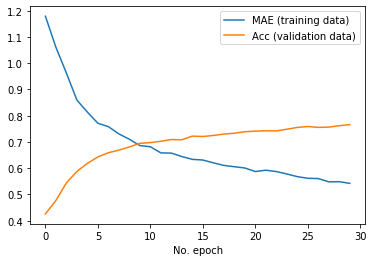

In [12]:
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['accuracy'], label='Acc (validation data)')
#plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [34]:
## lets test 
test = data.iloc[440:485, 1:].values.astype('float32') / 255.
test = test.reshape(test.shape[0], 48, 48, 1)
test.shape

(45, 48, 48, 1)

In [38]:
test_op = model.predict_classes(test)
print(test_op)
ret = []
for label in test_op:
    clas = r_mapping[label]
    ret.append(clas)
ret

[1 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 2 1 1 2 0 2 1 1 2 0 1 1 2 1 2 1 2
 2 1 2 1 1 1 2 2]


['Happy',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Sad',
 'Fear',
 'Sad',
 'Happy',
 'Happy',
 'Sad',
 'Fear',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Sad',
 'Happy',
 'Sad',
 'Sad',
 'Happy',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Sad']

In [39]:
data.iloc[440:485, 1:].to_csv('test.csv', index=False)